## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Define path

path = r'C:\Users\Asus\Zomato_restaurant_Bangalore\01 Data\Prepared Data'


In [3]:
# Import data

df = pd.read_csv(os.path.join(path, 'df_merged.csv'))

In [4]:
df.shape

(23035, 18)

In [5]:
df.dtypes

Unnamed: 0                       int64
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
KGISWardName                    object
dtype: object

In [6]:
df.drop("Unnamed: 0", axis=1, inplace= True)

In [7]:
df.dtypes

address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
KGISWardName                    object
dtype: object

In [8]:
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),KGISWardName
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,Banashankari Temple ward
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,Banashankari Temple ward
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,Casual Dining,"Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,Banashankari Temple ward
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,Banashankari Temple ward
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,Banashankari Temple ward


In [9]:
# Create a new Dataframe as "df_corr" and have all the numerical columns.
df_corr= df[["rate", "votes", "approx_cost(for two people)"]]


### 02 Creating Matrix Heatmap


In [10]:
df_corr.corr()

,rate,votes,approx_cost(for two people)
rate,1.000000,0.382126,0.315255
votes,0.382126,1.000000,0.310748
approx_cost(for two people),0.315255,0.310748,1.000000


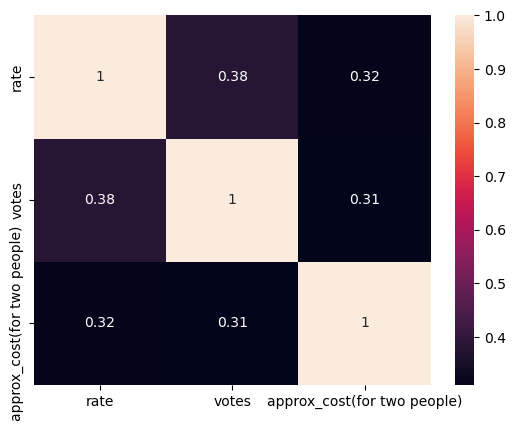

In [11]:
# Creating matrix heatmap using seaborn
corr = sns.heatmap(df_corr.corr(), annot = True)

There is a moderate relationship between votes, rate and approx_cost (for two people)


### 04 Creating a Scatterplot

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


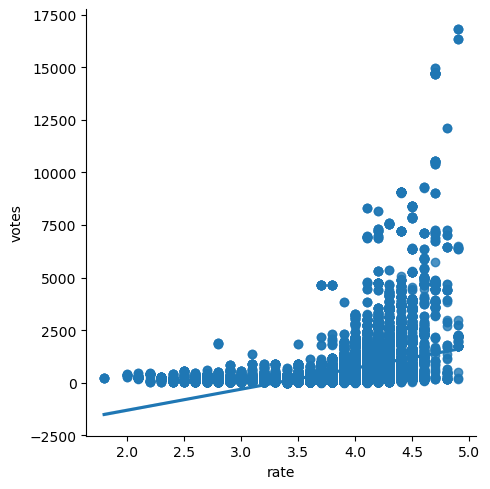

In [12]:
# Create a scatterplot for the "rate" and "votes" columns in seaborn

sns.lmplot(x = 'rate', y = 'votes', data = df)

The scatterplots illustrate weak relationship rate and votes.

### 05 Pair Plots:

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


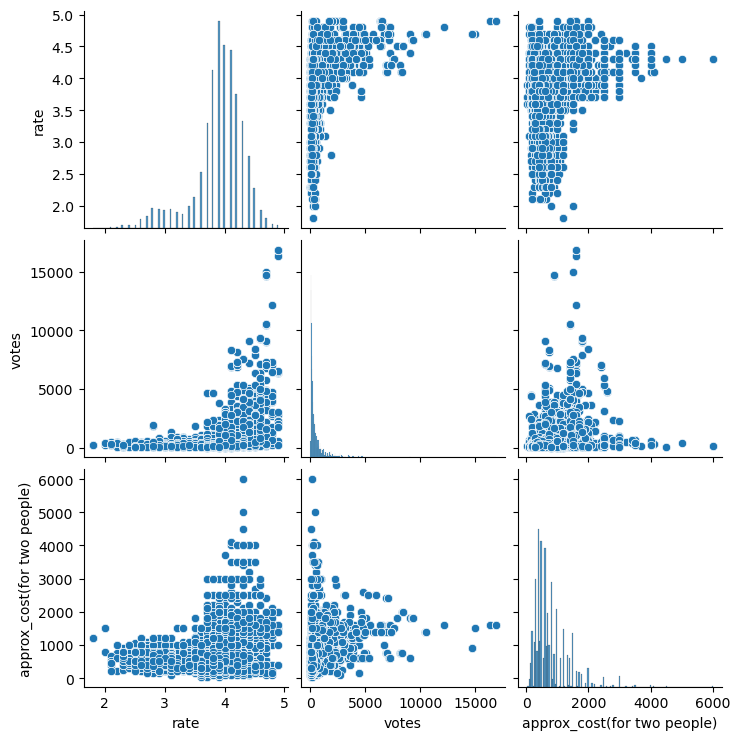

In [13]:
sns.pairplot(df_corr)

The moderate correlated pair plot looked how I'd expect. Although rate and votes have moderate correlation the scatterplot shows weak relationship. I'd like to look more into the variables that are weakly correlated.

### 06 Creating a Categorical Plot

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


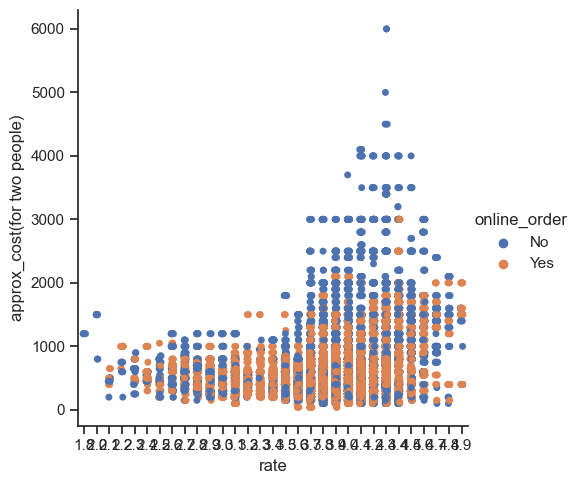

In [14]:
# Create a categorical plot in seabor

sns.set(style="ticks")
rco = sns.catplot(x="rate", y="approx_cost(for two people)", hue="online_order", data=df, jitter= True)

In the above categorical plot for approx_cost and rate using online_order as hue, We can see that restaurants below 2000 rupees are having both online and offline booking. However, anything over 2000 rupees are not online order.

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


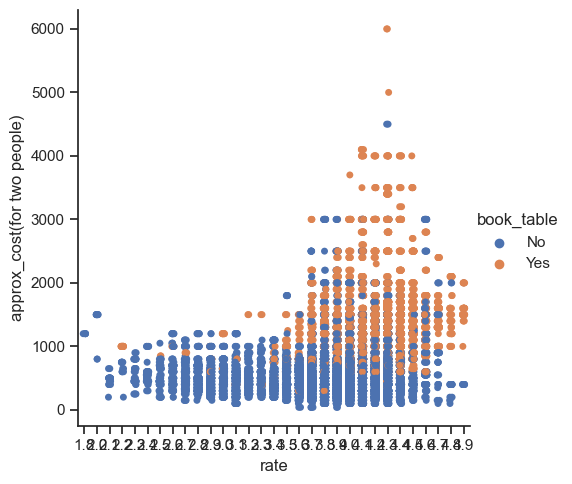

In [15]:
sns.set(style="ticks")
rcb = sns.catplot(x="rate", y="approx_cost(for two people)", hue="book_table", data=df, jitter= True)

We can see from the above categorical plot upto 1000 rupees there are no booking table. Most of the booking tables are above 1000 rupees. 

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


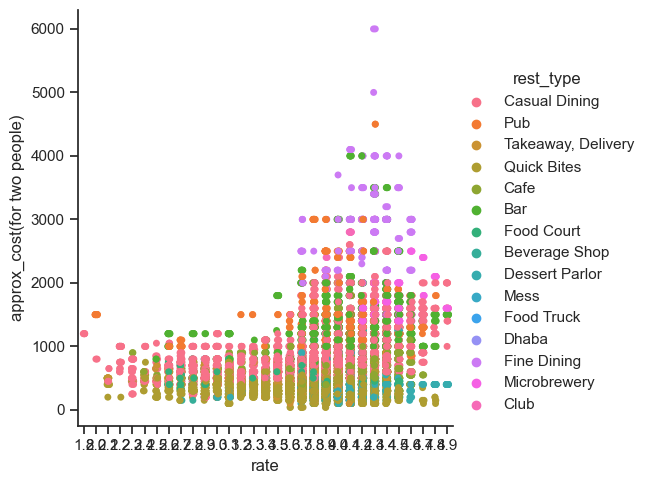

In [16]:
sns.set(style="ticks")
rcr = sns.catplot(x="rate", y="approx_cost(for two people)", hue="rest_type", data=df, jitter= True)

We can see that most the data points are of "Casual Dining" followed by "Quick Bites". We can see outlier over 5000 which belongs to "Fine Dining"

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


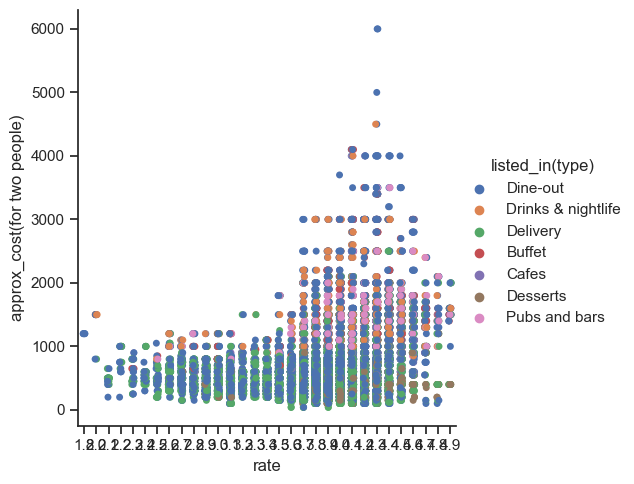

In [17]:
sns.set(style="ticks")
rcz = sns.catplot(x="rate", y="approx_cost(for two people)", hue="listed_in(type)", data=df, jitter= True)

We can see "Dine-out" from Zomato list has the most number of data points followed by "Pubs and Bar"

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


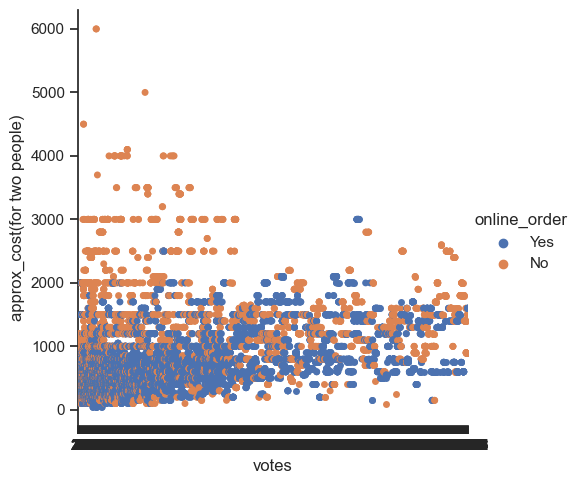

In [18]:
sns.set(style="ticks")
vco = sns.catplot(x="votes", y="approx_cost(for two people)", hue="online_order", data=df, jitter= True)

In the above categorical plot we can see most of the votes is for online_order and approx_price is around 2000 rupees.

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


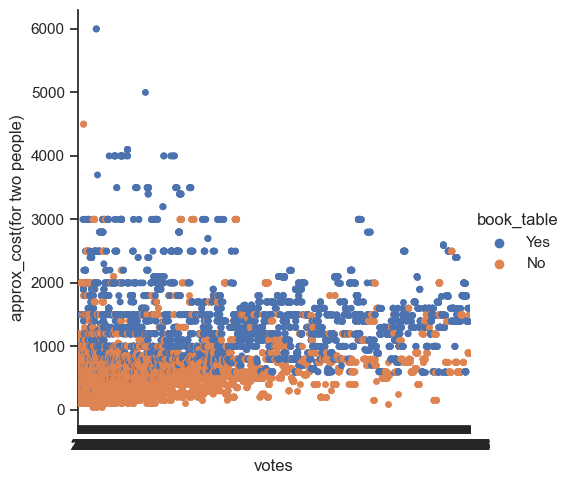

In [19]:
sns.set(style="ticks")
vcb = sns.catplot(x="votes", y="approx_cost(for two people)", hue="book_table", data=df, jitter= True)

In the above categorical plot we can see how booking table through Zomato has the highest data points

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


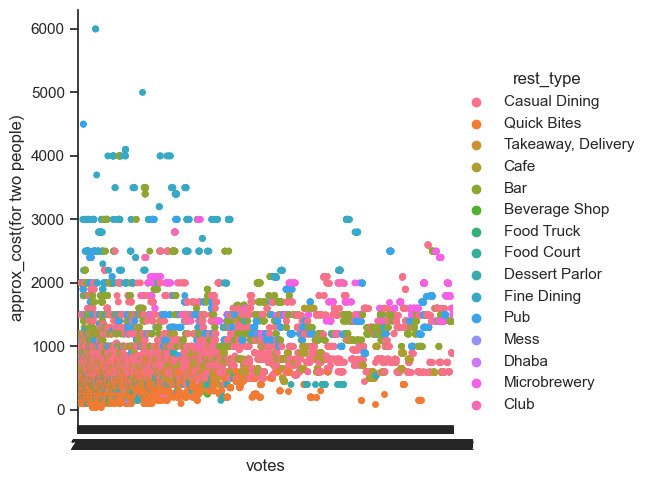

In [20]:
sns.set(style="ticks")
vcr = sns.catplot(x="votes", y="approx_cost(for two people)", hue="rest_type", data=df, jitter= True)

We can see huge number of highest number of data points for votes where the pricing is between 0 to 2000 rupees. Furthermore, we can see mixed resturant types. Over 2000 rupees we can see combination of "Fine Dining", "Pub", "Bar" and "Microbrewery" having the most votes

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


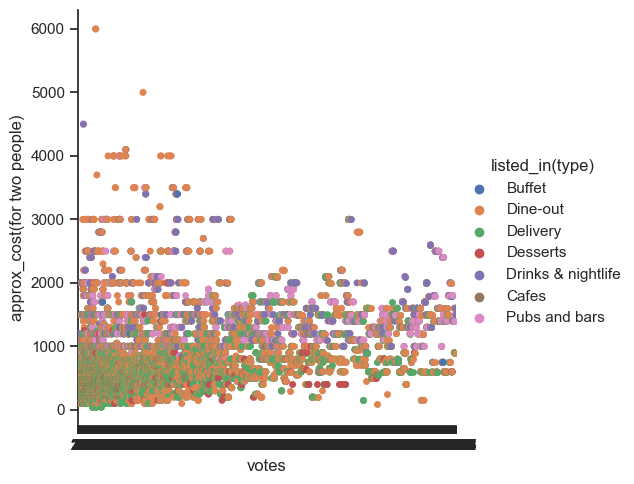

In [21]:
sns.set(style="ticks")
vcz = sns.catplot(x="votes", y="approx_cost(for two people)", hue="listed_in(type)", data=df, jitter= True)

In the above categorical plot we can see upto 1000 rupees we can see "Delivery" and "Dine-out". From 1000 to 2000 approx pricing we see rise in "Pubs and bars". Above 2000 rupees we can see combination of "Dine-out", "Drinks and nightlife" and "Pubs and bars" as per the listings in Zomato. 

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


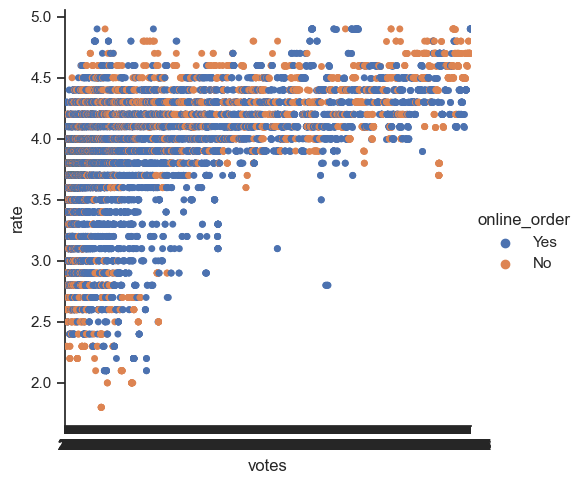

In [22]:
sns.set(style="ticks")
vro = sns.catplot(x="votes", y="rate", hue="online_order", data=df, jitter= True)

We can see from above categorical plot that the rating for online_order is high in comparison to "no" online_order

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


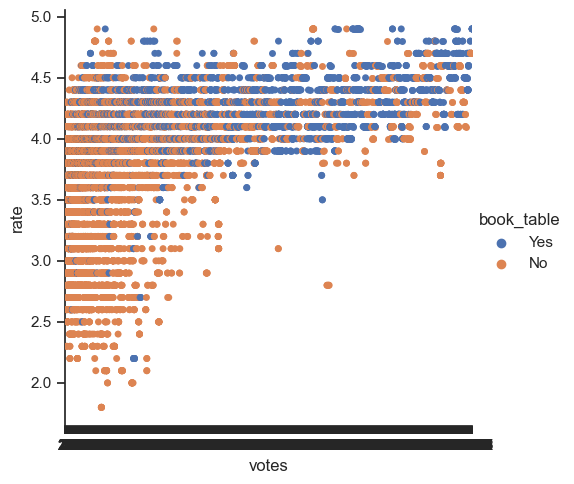

In [23]:
sns.set(style="ticks")
vrb = sns.catplot(x="votes", y="rate", hue="book_table", data=df, jitter= True)

We can see from above graph that there is a significant data points which has no booking table from Zomato and the rating has both average to really good ratings. However, we can see that the restaurants which has booking table available mostly has good rating.

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


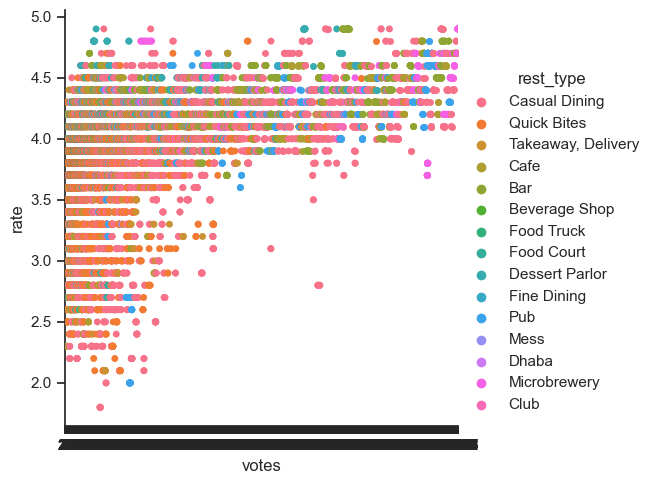

In [24]:
sns.set(style="ticks")
vrr = sns.catplot(x="votes", y="rate", hue="rest_type", data=df, jitter= True)

From the above graph most of the data points lie above 3.5 ratings and has mixture of different restaurat types

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


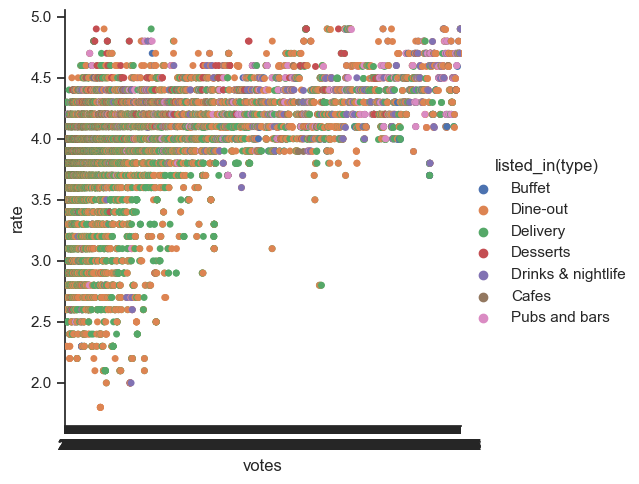

In [25]:
sns.set(style="ticks")
vrz = sns.catplot(x="votes", y="rate", hue="listed_in(type)", data=df, jitter= True)

From the above categorical plot we can see that most of data points deals with Delivery. 

### Q7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. 

7a) Does online_order from Zomato has better sales than offline_order?


Yes, the number of online orders are more in comparison to no online orders. However, orders which are not online has significant pricing and ratings are fairly good.


7b) Does booking_table from Zomato helps the restaurant in better rating?

Yes, booking table from Zomato has significantly rating.

### Q8. Define any hypotheses 

1. Null Hypothesis (H0): There is no difference in the average cost for two people between different restaurant locations.
   
   Alternative Hypothesis (Ha): The average cost for two people varies across different restaurant locations.
   
2. Null Hypothesis (H0): There is no association between restaurant type (e.g., café, fine dining, etc.) and the most liked dish.
   
   Alternative Hypothesis (Ha): There is an association between restaurant type and the most liked dish.

3. Null Hypothesis (H0): There is no difference in customer satisfaction ratings for restaurants offering specific menu items compared to those that do not.
   
    Alternative Hypothesis (Ha): Restaurants offering specific menu items receive higher customer satisfaction ratings.

4. Null Hypothesis (H0): There is no difference in the average rating among different cuisines served at restaurants.

    Alternative Hypothesis (Ha): Certain cuisines receive higher average ratings compared to others.